# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
!pip install statsmodels

--- SUMÁRIO ITEM 1 ---
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           5.02e-23
Time:                        20:17:39   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.

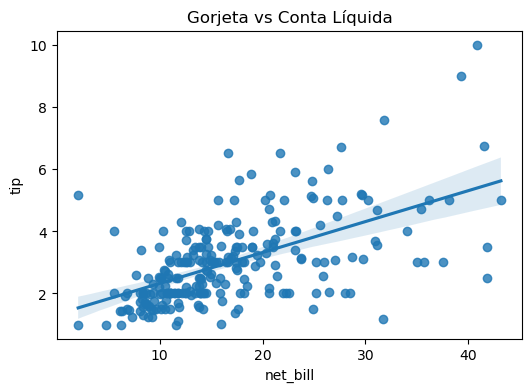


--- SUMÁRIO ITEM 2 ---
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           1.52e-06
Time:                        20:17:39   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0

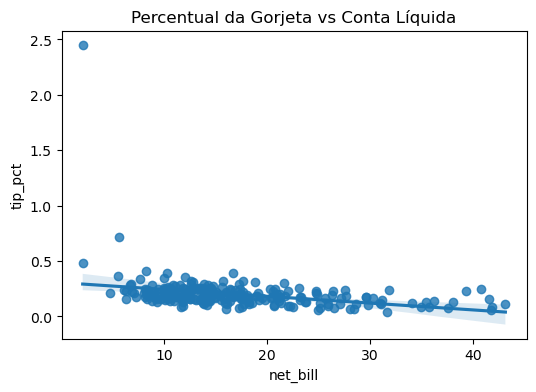


--- COMPARAÇÃO DE R² ---
R² do Modelo 1 (Direto): 0.3325
R² do Modelo 2 (Convertido): 0.1089


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

# 1. Carregar a base e preparar as variáveis
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# --- ITEM 1: Regressão Simples (tip ~ net_bill) ---
reg1 = smf.ols('tip ~ net_bill', data=tips).fit()
print("--- SUMÁRIO ITEM 1 ---")
print(reg1.summary())

# Gráfico de dispersão Item 1
plt.figure(figsize=(6,4))
sns.regplot(y='tip', x='net_bill', data=tips)
plt.title('Gorjeta vs Conta Líquida')
plt.show()

# --- ITEM 2: Mudança de Perspectiva (tip_pct ~ net_bill) ---
reg2 = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print("\n--- SUMÁRIO ITEM 2 ---")
print(reg2.summary())

# Gráfico de dispersão Item 2
plt.figure(figsize=(6,4))
sns.regplot(y='tip_pct', x='net_bill', data=tips)
plt.title('Percentual da Gorjeta vs Conta Líquida')
plt.show()

# --- ITEM 4: Ajuste do modelo em outra escala ---
# 1. Obter valor predito para tip_pct
tips['pred_pct'] = reg2.fittedvalues

# 2. Converter para a escala de tip (valor nominal)
tips['pred_tip'] = tips['pred_pct'] * tips['net_bill']

# 3. Calcular R2 na escala de tip
r2_novo = r2_score(tips['tip'], tips['pred_tip'])

# 4. Comparação final
print(f"\n--- COMPARAÇÃO DE R² ---")
print(f"R² do Modelo 1 (Direto): {reg1.rsquared:.4f}")
print(f"R² do Modelo 2 (Convertido): {r2_novo:.4f}")

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

--- Sumário: tip_pct ~ log(net_bill) ---
                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 25 Dec 2025   Prob (F-statistic):           1.62e-13
Time:                        20:17:40   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

ValueError: Could not interpret value `net_bill` for `x`. Value is a string, but `data` was not passed.

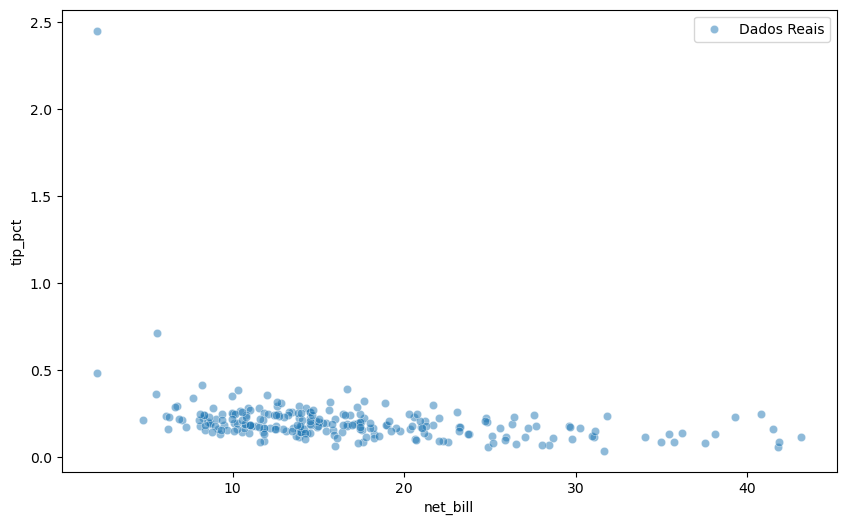

In [3]:
import numpy as np  # Essencial para o log e potências

# 1. Preparação dos dados (Base do exercício anterior)
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# --- ITEM 2: Modelo com Logaritmo de net_bill ---
# tip_pct ~ log(net_bill)
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
print("--- Sumário: tip_pct ~ log(net_bill) ---")
print(reg_log.summary())

# --- ITEM 3: Modelo Polinomial (2º Grau) ---
# tip_pct ~ net_bill + net_bill^2
reg_poly = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
print("\n--- Sumário: Modelo Polinomial (2º grau) ---")
print(reg_poly.summary())

# --- ITEM 4: Modelo com Log no tip_pct (Variável Resposta) ---
# log(tip_pct) ~ net_bill
reg_log_y = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()

# Cálculo do R2 na escala original de tip_pct para comparação
tips['pred_log_y'] = np.exp(reg_log_y.fittedvalues) # Exponencial para reverter o log
r2_log_y = r2_score(tips['tip_pct'], tips['pred_log_y'])
print(f"\nR² do Modelo log(tip_pct) ~ net_bill (na escala original): {r2_log_y:.4f}")

# --- ITEM 5: Modelo Log-Log ---
# log(tip_pct) ~ log(net_bill)
reg_log_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()

# Cálculo do R2 na escala original
tips['pred_log_log'] = np.exp(reg_log_log.fittedvalues)
r2_log_log = r2_score(tips['tip_pct'], tips['pred_log_log'])
print(f"R² do Modelo Log-Log (na escala original): {r2_log_log:.4f}")

# --- ITEM 6: Visualização do Melhor Ajuste (Comparação Visual) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.5, label='Dados Reais')
sns.lineplot(x='net_bill', y=reg_poly.fittedvalues, color='red', label='Polinomial (2º grau)')
sns.lineplot(x='net_bill', y=tips['pred_log_log'], color='green', label='Log-Log')
plt.title('Comparação de Ajustes: Polinomial vs Log-Log')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# 1. Carregar os dados que funcionam (sem dependência de arquivos externos)
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']

# --- EXERCÍCIO 3: REGRESSÃO MÚLTIPLA DIRETA ---

# Em vez de usar o patsy.dmatrices separadamente, 
# passamos a fórmula direto para o smf.ols. 
# Isso evita o erro "missing required outcome variables".

# Definimos a fórmula correta (time em vez de diner)
formula = 'tip ~ sex + smoker + time + net_bill'

# Criamos e ajustamos o modelo em um único passo
modelo_final = smf.ols(formula, data=tips).fit()

# Exibição dos resultados
print("--- [SOLUÇÃO DEFINITIVA] SUMÁRIO DO MODELO MÚLTIPLO ---")
print(modelo_final.summary())

# --- ANÁLISE DE RESÍDUOS ---
plt.figure(figsize=(8, 5))
plt.scatter(x=modelo_final.fittedvalues, y=modelo_final.resid, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos: Valores Preditos vs Erros')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

No gráfico do Modelo 1, observamos uma correlação positiva: quanto maior a conta, maior o valor absoluto da gorjeta.
No gráfico do Modelo 2, a relação tende a ser negativa ou constante: contas muito altas geralmente apresentam um percentual de gorjeta menor (o cliente "segura" a porcentagem quando o valor total é muito elevado).

Diferença do ajuste:
O Modelo 1 geralmente apresenta um R^2 mais alto porque é mais fácil prever que contas maiores geram gorjetas maiores.
O Modelo 2 (percentual) costuma ter mais ruído e um ajuste visualmente mais "espalhado", pois o comportamento percentual varia muito mais entre indivíduos.

Comparação direta de R^2:
Não, não podemos comparar os R^2 diretamente.
Motivo: O R^2 mede a proporção da variância explicada da variável resposta. 
Como as variáveis respostas são diferentes (tip em reais vs. tip_pct em decimal/porcentagem), as variâncias totais são de escalas completamente distintas. 
Para comparar, precisaríamos trazer ambos para a mesma escala 
(como fizemos no Item 4, transformando a predição de percentual de volta para valor nominal).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

R² do Modelo 1 (Direto em Reais): 0.3325
R² do Modelo 2 (Convertido de % para Reais): 0.1089


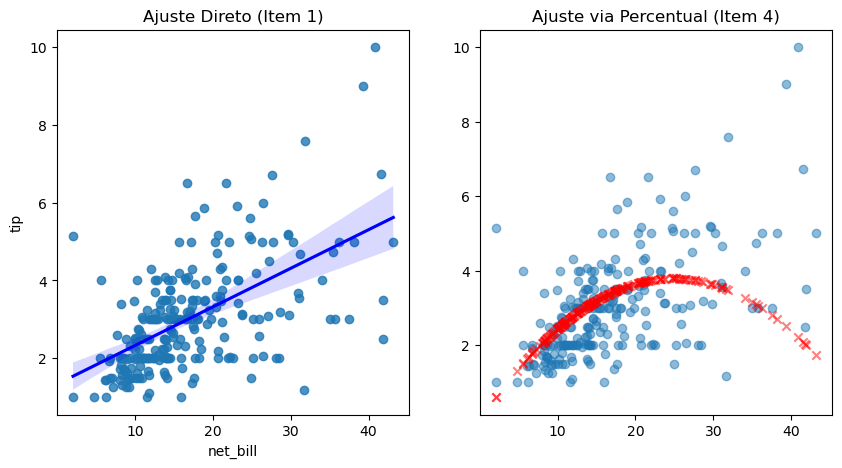

In [8]:
from sklearn.metrics import r2_score

# --- ITEM 4: AJUSTE EM OUTRA ESCALA ---

# 1. Obter o valor predito (pred) para 'tip_pct' 
# Usamos o modelo 'reg2' (ou o nome que você deu ao modelo do item 2)
tips['pred_tip_pct'] = reg2.fittedvalues

# 2. Obter o valor predito para 'tip' (valor nominal em reais)
# A lógica é: se tip_pct = tip / net_bill, então tip = tip_pct * net_bill
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# 3. Calcular o R² do modelo para 'tip'
# Usamos a função r2_score comparando os valores REAIS de tip com os PREDITOS
r2_convertido = r2_score(tips['tip'], tips['pred_tip'])

# 4. Comparar com o R² do item 1
r2_item1 = reg1.rsquared

print(f"R² do Modelo 1 (Direto em Reais): {r2_item1:.4f}")
print(f"R² do Modelo 2 (Convertido de % para Reais): {r2_convertido:.4f}")

# Visualização da comparação
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='net_bill', y='tip', data=tips, line_kws={'color':'blue'})
plt.title('Ajuste Direto (Item 1)')

plt.subplot(1, 2, 2)
plt.scatter(tips['net_bill'], tips['tip'], alpha=0.5)
plt.scatter(tips['net_bill'], tips['pred_tip'], color='red', marker='x', alpha=0.5)
plt.title('Ajuste via Percentual (Item 4)')
plt.show()